**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Import Datasets**

In [2]:
df_1 = pd.read_csv("application_data.csv")
df_2 = pd.read_csv("previous_application.csv")

**Unique columns in both the data sets**

In [3]:
app_cols=list(df_1.columns)
prev_app_cols=list(df_2.columns)

In [4]:
unique=[]
[unique.append(col) for col  in app_cols if col not in unique]
[unique.append(col) for col in prev_app_cols if col not in app_cols]

unique=list(set(unique))
    
len(list(unique))

151

**Common Columns in both the data sets**

In [5]:
com_cols=[]
[com_cols.append(col) for col in app_cols if col in prev_app_cols]
len(com_cols)

8

**Merge the data sets**

In [6]:
df_merge=pd.merge(df_1, df_2,on='SK_ID_CURR')
df_merge.shape

(1413701, 158)

In [7]:
df_merge.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,-1.632105e+04,6.870203e+04,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.452777e+05,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.828000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [8]:
df_3 = df_merge.copy()

In [9]:
df_3.shape

(1413701, 158)

**Remove rows with more than 10% null values**

In [10]:
drop_percent = 10.0 
count =  int(((100-drop_percent)/100)*df_3.shape[1] + 1)
df_3 = df_3.dropna( axis=0, 
                    thresh=count)

In [11]:
df_3.shape

(373125, 158)

**Correlation between the features**

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#df_3.corr()
df_3_corr_matrix = df_3.corr()

In [13]:
# Select upper triangle of correlation matrix
tri = df_3_corr_matrix.where(np.triu(np.ones(df_3_corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.98
high_corr = [column for column in tri.columns if any(tri[column] > 0.98)]
high_corr
#len(to_drop)

['AMT_GOODS_PRICE_x',
 'YEARS_BUILD_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE_y']

In [14]:
high_corr.remove("AMT_GOODS_PRICE_x")
high_corr.remove("YEARS_BUILD_MODE")
high_corr.remove("OBS_60_CNT_SOCIAL_CIRCLE")
high_corr.remove("AMT_GOODS_PRICE_y")

In [15]:
len(high_corr)

15

In [16]:
df_3 = df_3.drop(df_3[high_corr], axis=1)

In [17]:
df_3.shape

(373125, 143)

**Features with more than 50% null values**

In [18]:
null=((df_3.isna().sum()/len(df_3))*100).sort_values()
print("Number of features with Null values: ",null[null.values>50].count())

Number of features with Null values:  4


In [19]:
for columns in df_3.columns:
  if (df_3[columns].isna().sum()/len(df_3)*100)>50:
    df_3.drop(columns,axis=1,inplace=True)

In [20]:
df_3.shape

(373125, 139)

In [21]:
''''df_3 .drop(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
            'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG', 
            'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',
            'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
            'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
            'ENTRANCES_MODE','LANDAREA_MODE','WALLSMATERIAL_MODE',
            'SELLERPLACE_AREA'], axis=1)'''

"'df_3 .drop(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',\n            'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG', \n            'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',\n            'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',\n            'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',\n            'ENTRANCES_MODE','LANDAREA_MODE','WALLSMATERIAL_MODE',\n            'SELLERPLACE_AREA'], axis=1)"

In [22]:
df_3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0377,0.0220,0.0198,0.0,0.0,0.9722,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.0128,0.0790,0.0554,0.0,0.0,0.9851,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,9

In [23]:
list(df_3.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_

**Categortical and Numerical Data**

In [24]:
cat_dat = df_3.select_dtypes(include=['object']).columns
num_dat = df_3.select_dtypes(include=['int64','float64']).columns

**Replacing null values using Simple Imputer**

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np
from numpy import isnan

In [26]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
op=df_3[num_dat].values
val=imp.fit_transform(op)

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
op=df_3[cat_dat].values
val2=imp.fit_transform(op)

In [28]:
df_3[num_dat]=val
df_3[cat_dat]=val2

In [29]:
df_3.shape

(373125, 139)

In [30]:
y = df_3['TARGET']
df_3 = df_3.drop(['TARGET'],axis=1)

**Label Encoding for Categorical Data**

In [31]:
cat_dat

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [32]:
cat_col = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON','NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

In [33]:
from sklearn.preprocessing import LabelEncoder
for each_col in cat_col:
  le = LabelEncoder()
  df_3[each_col] = le.fit_transform(df_3[each_col])

In [34]:
df_new = df_3.copy()

In [35]:
df_new.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002.0,0,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0,6,5,4,3,1,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,8,1.0,2.0,2.0,6,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0377,0.0220,0.0198,0.0,0.0,0.9722,2,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,1,9251.775,179055.0,179055.0,0.000000,179055.0,2,9.0,1,1.0,0.000000,23,0,-606.0,3,7,6,0,24,3,0,7,500.0,0,24.0,3,15,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003.0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,1,2,1,1,1,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,3,2.0,1.0,1.0,1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,39,0.622246,0.493176,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.0128,0.0790,0.0554,0.0,0.0,0.9851,2,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,0,98356.995,900000.0,1035882.0,7099.094943,900000.0,0,12.0,1,1.0,0.082142,24,0,-746.0,3,7,6,2,26,2,2,5,-1.0,10,12.0,3,7,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003.0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,112950

In [36]:
list(num_dat)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEX

In [37]:
num_col = ['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x',
        'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS',
        'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START_x','REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
        'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
        'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
        'ELEVATORS_MODE','ENTRANCES_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
        'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
        'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
        'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
        'SK_ID_PREV','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y',
        'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
        'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

**Scaling for numerical values using Min Max Scaler**

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
df_new = df_new.drop(['SK_ID_CURR'],axis=1)

In [40]:
for col in df_new.columns:
    df_new[[col]] = scaler.fit_transform(df_new[[col]])

In [41]:
df_new['SK_ID_CURR'] = df_3['SK_ID_CURR']

In [42]:
x = df_new.copy()

In [43]:
colms = x.columns.tolist()
colms = colms[-1:] + colms[:-1]
x = x[colms]

In [44]:
x.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002.0,0.0,0.5,0.0,1.0,0.000000,0.039235,0.090287,0.103313,0.076404,1.000000,1.0,1.00,0.75,0.2,0.256321,0.898225,0.045086,0.840893,0.676385,0.0,1.0,0.0,1.0,1.0,0.0,0.470588,0.000000,0.5,0.5,1.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.307542,0.155407,0.0247,0.0369,0.965500,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0377,0.0220,0.0198,0.0,0.0,0.9722,0.666667,0.0,0.0149,0.833333,0.0,0.071429,0.333333,0.071429,0.333333,0.735788,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.021035,0.333333,0.022137,0.030608,0.039705,0.000000,0.030608,0.333333,0.391304,1.0,1.0,0.000000,0.958333,0.0,0.793151,1.0,0.875,1.000000,0.000000,0.923077,0.75,0.0,1.000000,0.000125,0.0,0.333333,0.75,0.9375,1.0,0.006321,0.007950,0.007769,0.007750,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.000000,0.054326,0.311736,0.153732,0.270787,0.166667,0.4,0.25,0.25,0.2,0.045016,0.481306,0.043648,0.948273,0.955579,0.0,1.0,0.0,1.0,1.0,0.0,0.176471,0.052632,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.684211,0.727773,0.551402,0.0959,0.0529,0.981509,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.0128,0.0790,0.0554,0.0,0.0,0.9851,0.666667,0.0,0.0714,0.000000,0.0,0.035714,0.000000,0.035714,0.000000,0.807083,0.0,1.0,0.0,0.0,0.0,0.0,0

In [45]:
y.value_counts()

0.0    345937
1.0     27188
Name: TARGET, dtype: int64

**Data Split**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((261187, 138), (111938, 138), (261187,), (111938,))

**Balancing dataset using Random UnderSampler**

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rnus = RandomUnderSampler(sampling_strategy=1)
X_train_rnus, y_train_rnus = rnus.fit_resample(X_train,y_train)

In [49]:
X_test_rnus,y_test_rnus = rnus.fit_resample(X_test,y_test)

In [50]:
y_train_rnus.value_counts()

0.0    19040
1.0    19040
Name: TARGET, dtype: int64

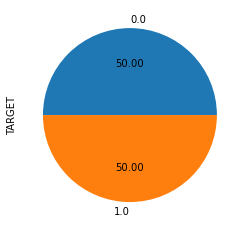

In [51]:
plt_rnus = y_train_rnus.value_counts().plot.pie(autopct='%.2f')

**Machine Learning Algorithms**

In [52]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

***Logistic Regression***

In [53]:
grid_params_lr = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [0,100], 'n_jobs' : [0,10],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C':[0.0,1.0]}
gs_lr = GridSearchCV( LogisticRegression(), grid_params_lr, verbose = 1, cv = 3, n_jobs = -1 )
gs_lr_results = gs_lr.fit(X_train_rnus, y_train_rnus) 
gs_lr_results.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


{'C': 0.0,
 'max_iter': 100,
 'n_jobs': 10,
 'penalty': 'none',
 'solver': 'newton-cg'}

In [54]:
lr = LogisticRegression(solver='newton-cg', max_iter = 100, n_jobs = 10)
lr.fit(X_train_rnus, y_train_rnus)

LogisticRegression(n_jobs=10, solver='newton-cg')

In [55]:
y_pred = lr.predict(X_test)

In [56]:
acc_lr = accuracy_score(y_test, y_pred)
pre_lr = precision_score(y_test, y_pred)
re_lr = recall_score(y_test, y_pred)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.6863620933016491
Precision of the classifier is: 0.14737888458721357
Recall of the classifier is: 0.6914580265095729


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80    103790
         1.0       0.15      0.69      0.24      8148

    accuracy                           0.69    111938
   macro avg       0.56      0.69      0.52    111938
weighted avg       0.91      0.69      0.76    111938



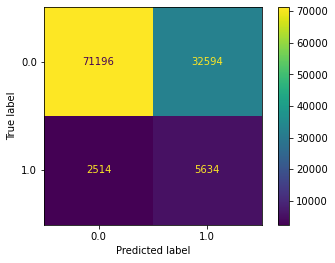

In [58]:
plot_confusion_matrix(lr,X_test, y_test)

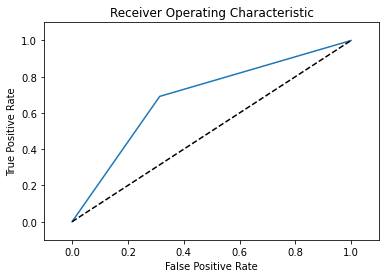

In [59]:
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1, tpr_1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
auc_lr = metrics.auc(fpr_1, tpr_1)
auc_lr

0.688710032620814

***K Nearest Neighbors***

In [61]:
grid_params_knn = {'n_neighbors':[3,19], 'weights':['uniform', 'distance'],
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[10,50],
                   'metric':['euclidean','minkowski'] }
gs_knn = GridSearchCV( KNeighborsClassifier(), grid_params_knn, verbose = 1, cv = 3, n_jobs = -1 )
gs_knn_results = gs_knn.fit(X_train_rnus, y_train_rnus) 
gs_knn_results.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 3,
 'weights': 'distance'}

In [62]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance', algorithm='auto',leaf_size=10 )
knn.fit(X_train_rnus, y_train_rnus)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=3,
                     weights='distance')

In [63]:
y_pred2 = knn.predict(X_test)

In [64]:
acc_knn = accuracy_score(y_test, y_pred2)
pre_knn = precision_score(y_test, y_pred2)
re_knn = recall_score(y_test, y_pred2)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred2)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred2)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred2)}")

Accuracy of the classifier is: 0.7699172756347263
Precision of the classifier is: 0.2314122707996461
Recall of the classifier is: 0.9309032891507119


In [65]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86    103790
         1.0       0.23      0.93      0.37      8148

    accuracy                           0.77    111938
   macro avg       0.61      0.84      0.61    111938
weighted avg       0.94      0.77      0.82    111938



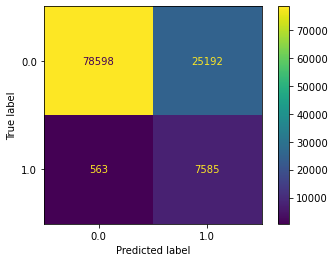

In [66]:
plot_confusion_matrix(knn,X_test, y_test)

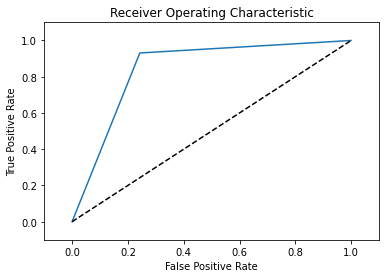

In [67]:
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_2, tpr_2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
auc_knn = metrics.auc(fpr_2, tpr_2)
auc_knn

0.844091205226671

***Decision Tree Classifier***

In [69]:
grid_params_dt = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[1,10],'splitter':['best', 'random']}
gs_dt = GridSearchCV( DecisionTreeClassifier(), grid_params_dt, verbose = 1, cv = 3, n_jobs = -1 )
gs_dt_results = gs_dt.fit(X_train_rnus, y_train_rnus) 
gs_dt_results.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [70]:
dt = DecisionTreeClassifier(criterion= 'gini', random_state=0, splitter='best')
dt.fit(X_train_rnus, y_train_rnus)

DecisionTreeClassifier(random_state=0)

In [71]:
y_pred3 = dt.predict(X_test)

In [72]:
acc_dt = accuracy_score(y_test, y_pred3)
pre_dt = precision_score(y_test, y_pred3)
re_dt = recall_score(y_test, y_pred3)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred3)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred3)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred3)}")

Accuracy of the classifier is: 0.8115474637745895
Precision of the classifier is: 0.26613922907409415
Recall of the classifier is: 0.9041482572410408


In [73]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89    103790
         1.0       0.27      0.90      0.41      8148

    accuracy                           0.81    111938
   macro avg       0.63      0.85      0.65    111938
weighted avg       0.94      0.81      0.85    111938



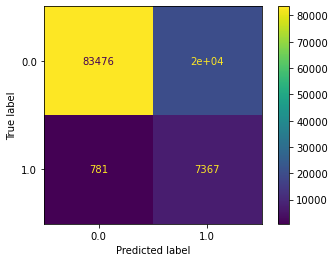

In [74]:
plot_confusion_matrix(dt,X_test, y_test)

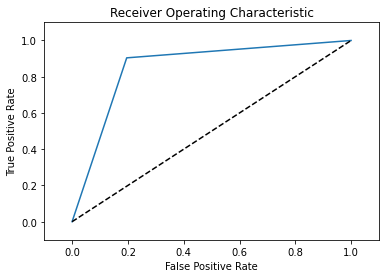

In [75]:
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_pred3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_3, tpr_3)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
auc_dt = metrics.auc(fpr_3, tpr_3)
auc_dt

0.8542130630072629

***Random Forest Classifier***

In [77]:
grid_params_rfc = {'n_estimators':[50,150], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[0,10],
                   'max_features':['sqrt', 'log2', 'None'], 'random_state':[0,100], 'n_jobs' : [0,10]}
gs_rfc = GridSearchCV( RandomForestClassifier(), grid_params_rfc, verbose = 1, cv = 3, n_jobs = -1 )
gs_rfc_results = gs_rfc.fit(X_train_rnus, y_train_rnus) 
gs_rfc_results.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'n_jobs': 10,
 'random_state': 0}

In [78]:
rfc = RandomForestClassifier(random_state=42,criterion = 'gini',max_features='sqrt',n_estimators=150,n_jobs=10)

In [79]:
rfc.fit(X_train_rnus, y_train_rnus)

RandomForestClassifier(n_estimators=150, n_jobs=10, random_state=42)

In [80]:
y_pred4 = rfc.predict(X_test)

In [81]:
acc_rfc = accuracy_score(y_test, y_pred4)
pre_rfc = precision_score(y_test, y_pred4)
re_rfc = recall_score(y_test, y_pred4)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred4)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred4)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred4)}")

Accuracy of the classifier is: 0.9106737658346584
Precision of the classifier is: 0.4448549127092892
Recall of the classifier is: 0.9162984781541482


In [82]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95    103790
         1.0       0.44      0.92      0.60      8148

    accuracy                           0.91    111938
   macro avg       0.72      0.91      0.77    111938
weighted avg       0.95      0.91      0.92    111938



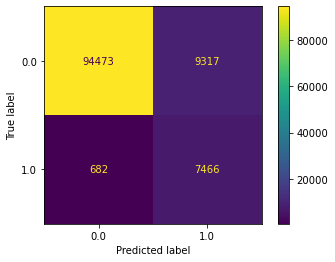

In [83]:
plot_confusion_matrix(rfc,X_test, y_test)

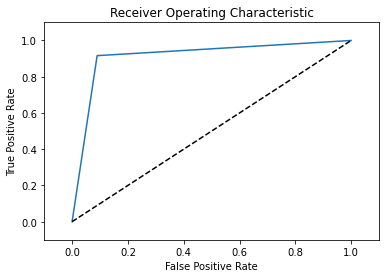

In [84]:
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_4, tpr_4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
auc_rfc = metrics.auc(fpr_4, tpr_4)
auc_rfc

0.9132653388940122

***AdaBoost Classifier***

In [86]:
grid_params_ada = {'n_estimators':[1,100],'random_state':[1,100]}
gs_ada = GridSearchCV( AdaBoostClassifier(), grid_params_ada, verbose = 1, cv = 3, n_jobs = -1 )
gs_ada_results = gs_ada.fit(X_train_rnus, y_train_rnus) 
gs_ada_results.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'n_estimators': 100, 'random_state': 1}

In [87]:
ada = AdaBoostClassifier(n_estimators=100, random_state=1)
ada.fit(X_train_rnus, y_train_rnus)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [88]:
y_pred5 = ada.predict(X_test)

In [89]:
acc_ada = accuracy_score(y_test, y_pred5)
pre_ada = precision_score(y_test, y_pred5)
re_ada = recall_score(y_test, y_pred5)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred5)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred5)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred5)}")

Accuracy of the classifier is: 0.7022012185316872
Precision of the classifier is: 0.1536155348351074
Recall of the classifier is: 0.6854442808051056


In [90]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81    103790
         1.0       0.15      0.69      0.25      8148

    accuracy                           0.70    111938
   macro avg       0.56      0.69      0.53    111938
weighted avg       0.91      0.70      0.77    111938



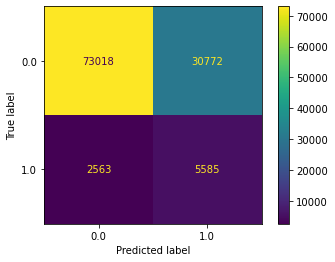

In [91]:
plot_confusion_matrix(ada,X_test, y_test)

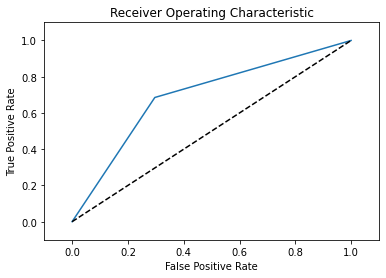

In [92]:
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_pred5)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_5, tpr_5)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
auc_ada = metrics.auc(fpr_5, tpr_5)
auc_ada

0.6944804986258883

***Gradient Boosting Classifier***

In [94]:
grid_params_gb = {'n_estimators':[1,150],'max_depth':[0,10],'random_state':[1,100],'max_features':['auto', 'sqrt', 'log2']}
gs_gb = GridSearchCV( GradientBoostingClassifier(), grid_params_gb, verbose = 1, cv = 3, n_jobs = -1 )
gs_gb_results = gs_gb.fit(X_train_rnus, y_train_rnus) 
gs_gb_results.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 150,
 'random_state': 100}

In [95]:
gb = GradientBoostingClassifier(random_state=100,max_depth=10,max_features='auto',n_estimators=150)
gb.fit(X_train_rnus, y_train_rnus)

GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=150,
                           random_state=100)

In [96]:
y_pred6 = gb.predict(X_test)

In [97]:
acc_gb = accuracy_score(y_test, y_pred6)
pre_gb = precision_score(y_test, y_pred6)
re_gb = recall_score(y_test, y_pred6)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred6)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred6)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred6)}")

Accuracy of the classifier is: 0.9027408029444871
Precision of the classifier is: 0.424240747911711
Recall of the classifier is: 0.9412125675012273


In [98]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94    103790
         1.0       0.42      0.94      0.58      8148

    accuracy                           0.90    111938
   macro avg       0.71      0.92      0.76    111938
weighted avg       0.95      0.90      0.92    111938



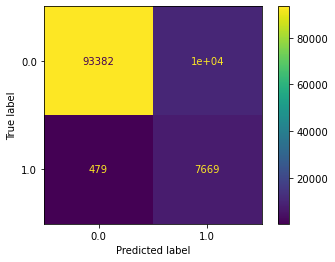

In [99]:
plot_confusion_matrix(gb,X_test, y_test)

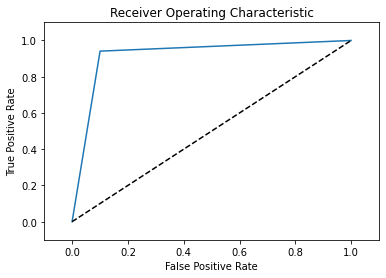

In [100]:
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_pred6)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_6, tpr_6)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
auc_gb = metrics.auc(fpr_6, tpr_6)
auc_gb

0.9204665785767047

***XGboost***

In [102]:
from xgboost import XGBClassifier

In [103]:
grid_params_xgb = {'max_depth':[1,20], }
gs_xgb = GridSearchCV(XGBClassifier(), grid_params_xgb, verbose = 1, cv = 3, n_jobs = -1 )
gs_xgb_results = gs_xgb.fit(X_train_rnus, y_train_rnus) 
gs_xgb_results.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


{'max_depth': 20}

In [104]:
xgb =  XGBClassifier(random_state=0,max_depth=20)
xgb.fit(X_train_rnus, y_train_rnus)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [105]:
y_pred7 = xgb.predict(X_test)

In [106]:
acc_xgb = accuracy_score(y_test, y_pred7)
pre_xgb = precision_score(y_test, y_pred7)
re_xgb = recall_score(y_test, y_pred7)
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred7)}")
print(f"Precision of the classifier is: {precision_score(y_test, y_pred7)}")
print(f"Recall of the classifier is: {recall_score(y_test, y_pred7)}")

Accuracy of the classifier is: 0.9092712037020494
Precision of the classifier is: 0.4424443934877322
Recall of the classifier is: 0.9472263132056946


In [107]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    103790
         1.0       0.44      0.95      0.60      8148

    accuracy                           0.91    111938
   macro avg       0.72      0.93      0.78    111938
weighted avg       0.96      0.91      0.92    111938



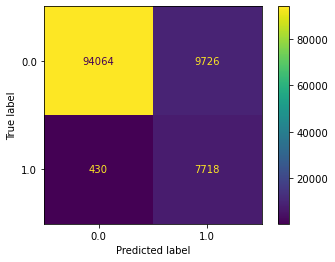

In [108]:
plot_confusion_matrix(xgb,X_test, y_test)

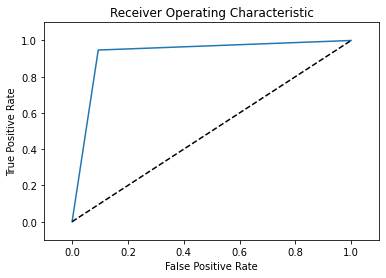

In [109]:
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_pred7)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_7, tpr_7)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
auc_xgb = metrics.auc(fpr_7, tpr_7)
auc_xgb

0.9267589317256915

**Fully Connected Neural Network**

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA 
# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import cohen_kappa_score
# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from functools import reduce
# Keras Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization,Layer
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import backend as K

In [112]:
def calculate_metrics(pred_class, pred, y_test):
    '''
    This function calculates the classificaiton metrics including precision, recall, F1-Score, AUC_ROC, and cohen-kappa coefficient.

    Parameters:
    pred_class: Binary class prediction of the target variable.
    pred: Probability prediction of the target variable.
    y_test: y_test in the trainig dataset

    Returns:
    None
    '''

    # ROC_AUC score
    print('ROC_AUC of the test set:', roc_auc_score(y_test, pred))
    # Precision/Recall (0.1 Threshold)
    pred_class_2 = (np.array(pred) > 0.5).astype(int)
    cm = confusion_matrix(y_test, pred_class_2)
    print('\nConfusion_metrix (0.5 Threshold): \n', cm)
    # True Negatives (TN)
    tn = cm[0][0]
    # False Positives (FP)
    fp = cm[0][1]    
    # False Negatives (FN)
    fn = cm[1][0]
    # True Positives (TP)
    tp = cm[1][1]
    precision = tp / (tp + fp)
    print( 'Precision (0.5 Threshold): ', precision )
    recall = tp / (tp + fn)
    print( 'Recall (0.5 Threshold): ', recall )
    print( 'F1-score ( 0.5 Threshold):', 2*precision*recall/(precision+recall))
    cohen_kappa = cohen_kappa_score(y_test, pred_class_2)
    print( '\nCohen_kappa (0.5 Threshold): ', cohen_kappa )
    accuracy = (tp+tn) / (tp + tn + fp + fn)
    print( 'Accuracy ( 0.5 Threshold):', accuracy) 
    s = sns.heatmap(cm, annot=True, fmt='d')
    s.set_xlabel('\nPredicted Label')
    s.set_ylabel('True Label')
    s.xaxis.set_ticklabels(['0.0','1.0'])
    s.yaxis.set_ticklabels(['0.0','1.0'])
    plt.show()

    
def plot_ROC(y_test, pred):
    '''
    This function plots ROC based on y_test and predictied probability of positive class by lightGBM.

    Parameters:
    pred: Probability prediction of the target variable.
    y_test: y_test in the trainig dataset

    Returns:
    None
    '''

    # Initialize figure
    #fig = plt.figure(figsize=(9,9))
    plt.title('Receiver Operating Characteristic')
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr)
    # Diagonal 45 degree line
    plt.plot([0,1],[0,1],'k--')
    # Axes limits and labels
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_precision_recall(y_test, pred):
    '''
    This function plots precicision_recall curve based on y_test and predictied probability of positive class by lightGBM..

    Parameters:
    pred: Probability prediction of the target variable.
    y_test: y_test in the trainig dataset
    
    Returns:
    None
    '''

    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    #fig = plt.figure(figsize=(9,9))
    plt.title('Precision_Recall')
    # Plot Precision-Recall curve
    plt.plot(recall, precision)
    # Axes limits and labels
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2224      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

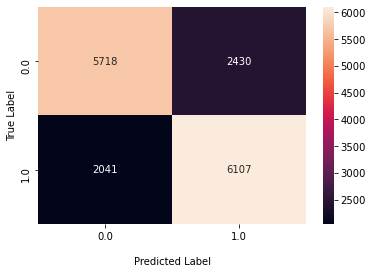

In [113]:
sc = StandardScaler()
X_train_rnus = sc.fit_transform(X_train_rnus)
X_train = X_train_rnus
X_test_rnus = sc.fit_transform(X_test_rnus)
y_test = y_test_rnus
y_train = y_train_rnus
# Deep FCNN implementation
# FCNN architecture includes 3 fully connected units having 150, 75, 25 neurons, respectively.
batch_size = 500
epochs = 100
np.random.seed(5)  

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train),y = y_train.values.reshape(-1))
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

#FC1
model = Sequential()
model.add(Dense(input_shape= (X_train.shape[1],), units = 16))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#FC2
model.add(Dense(units = 32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#FC3
model.add(Dense(units = 64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
#model.build()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['AUC'])
model.summary()

# Train deep neural network
early_stops = EarlyStopping(patience=10, monitor='val_auc')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, validation_data = (X_test_rnus, y_test),  callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)
#model.fit(X_train, y_train, validation_split = 0.3,  callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)
#model.evaluate(X_test_rnus, y_test_rnus)

# Binary class prediction, Keras predict method always return probability (unlike Sklearn!)
pred_class = np.argmax(model.predict(X_test_rnus), axis=-1)
# Probability prediction
pred = model.predict(X_test_rnus)


calculate_metrics(pred_class, pred, y_test)


# Plot ROC curve
#plot_ROC(y_test, pred)


# Plot Precision/R curve
#plot_precision_recall(y_test, pred)


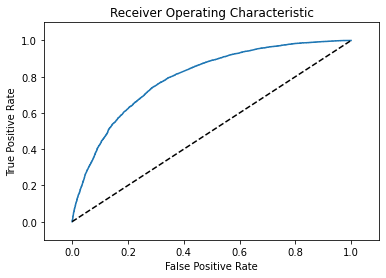

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [115]:
from sklearn import metrics
auc_fcnn = metrics.auc(fpr, tpr)
auc_fcnn

0.7952953434004062

In [116]:
roc_auc_score(y_test, pred, average=None)

0.7952953434004062

In [125]:
acc_fcnn = 0.725638
pre_fcnn = 0.715356
re_fcnn = 0.749509

In [126]:
dict = { 'Algorithms' : ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree Classifier', 
                         'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boost Classifier',
                         'Extreme Gradient Boost Classifier', 'Fully Connected Neural Network'],
        'Accuracy' : [acc_lr, acc_knn, acc_dt, acc_rfc, acc_ada, acc_gb, acc_xgb, acc_fcnn],
        'Precision' : [pre_lr, pre_knn, pre_dt, pre_rfc, pre_ada, pre_gb, pre_xgb, pre_fcnn],
        'Recall' : [re_lr, re_knn, re_dt, re_rfc, re_ada, re_gb, re_xgb, re_fcnn],
        'AUC' : [auc_lr, auc_knn, auc_dt, auc_rfc, auc_ada ,auc_gb, auc_xgb, auc_fcnn]}
dataframe = pd.DataFrame(dict)
dataframe.style

,Algorithms,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.686362,0.147379,0.691458,0.688710
1,K Nearest Neighbors,0.769917,0.231412,0.930903,0.844091
2,Decision Tree Classifier,0.811547,0.266139,0.904148,0.854213
3,Random Forest Classifier,0.910674,0.444855,0.916298,0.913265
4,AdaBoost Classifier,0.702201,0.153616,0.685444,0.694480
5,Gradient Boost Classifier,0.902741,0.424241,0.941213,0.920467
6,Extreme Gradient Boost Classifier,0.909271,0.442444,0.947226,0.926759
7,Fully Connected Neural Network,0.725638,0.715356,0.749509,0.795295
